In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting 
from sklearn.model_selection import train_test_split #splitting data
from sklearn.preprocessing import StandardScaler #scaling data
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.metrics import accuracy_score #accuracy score
from mlxtend.plotting import plot_decision_regions #plotting decision regions
import pickle #saving model

In [70]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/placement-project-logistic-regression/main/placement.csv") # To read the dataset in a dataframe using pandas
df.head() # To display first 5 rows of the dataset

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [71]:
df=df.iloc[:,1:] # To remove the serial number column (column 0, starting from 0)
df.head() # To display first 5 rows of the dataset

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [72]:
df.isnull().sum() # To check for null values in the dataset 

cgpa         0
iq           0
placement    0
dtype: int64

In [73]:
df.info() # To get the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [74]:
df.shape # To get the shape of the dataset

(100, 3)

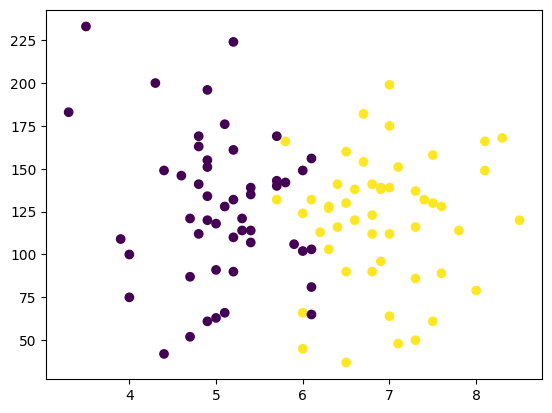

In [75]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) # To plot the scatter plot between cgpa and iq with placement as the target variable

In [76]:
X = df.iloc[:,0:2] # To get the independent features
y = df.iloc[:,-1] # To get the dependent feature

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1) #   To split the dataset into training and testing set

In [78]:
scaler = StandardScaler()

In [79]:
X_train = scaler.fit_transform(X_train) # To scale the training set
X_train # To scale the training set

array([[-0.51526181, -0.47424316],
       [ 0.10070582, -1.12282821],
       [-1.04323407,  0.3739065 ],
       [ 0.98065958, -1.9460323 ],
       [-2.18717396,  2.66889973],
       [-0.25127569,  0.42379766],
       [ 2.0366041 ,  1.04743712],
       [ 0.10070582, -0.57402548],
       [-0.77924794,  0.04961398],
       [-0.86724332, -1.57184862],
       [ 1.24464571,  0.1493963 ],
       [ 0.10070582,  0.74809018],
       [-1.83519246, -0.42435201],
       [ 0.62867808,  0.69819902],
       [-0.9552387 , -0.14995064],
       [ 0.5406827 , -0.14995064],
       [-0.25127569,  0.34896093],
       [-1.04323407,  1.0723827 ],
       [-0.25127569,  0.1493963 ],
       [-1.48321095,  1.84569564],
       [-0.86724332, -0.1998418 ],
       [ 0.01271044, -0.59897106],
       [ 0.10070582, -1.52195746],
       [-0.77924794, -1.49701188],
       [-0.60325719, -0.12500507],
       [-0.69125257,  0.87281807],
       [ 0.62867808,  1.39667522],
       [-1.13122945, -0.97315473],
       [ 0.89266421,

In [80]:
X_test = scaler.transform(X_test) # To scale the testing set
X_test # To display the scaled testing set

array([[-0.51526181,  0.22423303],
       [-0.69125257, -0.39940643],
       [ 1.42063646, -0.92326358],
       [ 0.80466883, -0.74864453],
       [-1.39521558, -2.09570577],
       [ 0.45268732, -0.898318  ],
       [ 0.89266421, -0.34951527],
       [ 0.80466883,  0.29906977],
       [ 0.45268732,  0.09950514],
       [-1.74719708, -1.27250168]])

In [81]:
clf = LogisticRegression()

In [82]:
clf.fit(X_train,y_train)

LogisticRegression()

In [83]:
y_pred = clf.predict(X_test)
display(y_pred)

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [84]:
accuracy_score(y_test,y_pred) 

1.0

<Axes: >

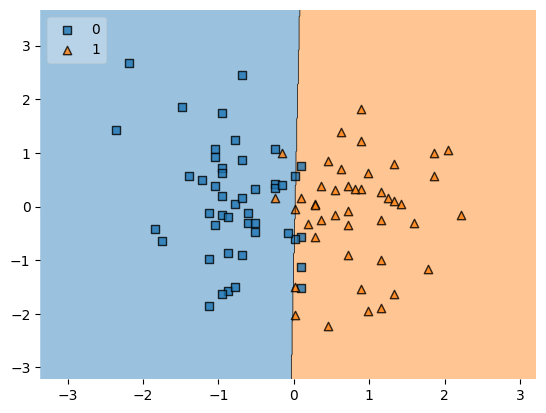

In [85]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2) # To plot the decision regions

In [86]:
pickle.dump(clf,open('model.pkl','wb')) # To save the model